In [1]:
import numpy as np
import pandas
import os
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import gaussian_kde
import torch
import sys
from tqdm import tqdm
import h5py

# Set up path to import from src
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

# Import pokie from pokie.py
from pokie import pokie, pokie_bootstrap, get_device, pokie_with_convergence_estimate

In [2]:
image_dim = 64

In [3]:
# Ground Truth Data
Truth_Data_epl_multiple_sersic_sources_hdf5 = h5py.File('/Users/sammysharief/Downloads/Lensing_Pokie/Lens_Data_Varying_Parameters_Pixel_Scale_0.1_Image_64_64_Parameter_Setup_1/Truth_Data/EPL_Multiple_Serseic_Sources.hdf5', 'r')
Truth_Data_epl_multiple_sersic_sources = Truth_Data_epl_multiple_sersic_sources_hdf5['EPL_Multiple_Serseic_Sources']

In [4]:
# Experiment 1 Data
experiment_1_sie_multiple_sersic_sources_hdf5 = h5py.File('/Users/sammysharief/Downloads/Lensing_Pokie/Lens_Data_Varying_Parameters_Pixel_Scale_0.1_Image_64_64_Parameter_Setup_1/Experiment_1/SIE_Multiple_Serseic_Sources.hdf5', 'r')
experiment_2_sie_1_sersic_sources_hdf5 = h5py.File('/Users/sammysharief/Downloads/Lensing_Pokie/Lens_Data_Varying_Parameters_Pixel_Scale_0.1_Image_64_64_Parameter_Setup_1/Experiment_2/SIE_1_Serseic_Sources.hdf5', 'r')
experiment_3_epl_1_sersic_sources_hdf5 = h5py.File('/Users/sammysharief/Downloads/Lensing_Pokie/Lens_Data_Varying_Parameters_Pixel_Scale_0.1_Image_64_64_Parameter_Setup_1/Experiment_3/EPL_1_Serseic_Sources.hdf5', 'r')
experiment_4_epl_multiple_sersic_sources_v2_hdf5 = h5py.File('/Users/sammysharief/Downloads/Lensing_Pokie/Lens_Data_Varying_Parameters_Pixel_Scale_0.1_Image_64_64_Parameter_Setup_1/Experiment_4/EPL_Multiple_Serseic_Sources_V2.hdf5', 'r')

experiment_1_sie_multiple_sersic_sources = experiment_1_sie_multiple_sersic_sources_hdf5['SIE_Multiple_Serseic_Sources']
experiment_2_sie_1_sersic_sources = experiment_2_sie_1_sersic_sources_hdf5['SIE_1_Serseic_Sources']
experiment_3_epl_1_sersic_sources = experiment_3_epl_1_sersic_sources_hdf5['EPL_1_Serseic_Sources']
experiment_4_epl_multiple_sersic_sources_v2 = experiment_4_epl_multiple_sersic_sources_v2_hdf5['EPL_Multiple_Serseic_Sources_V2']

In [5]:
# Print Shapes of the datasets
print("Truth Data EPL Multiple Sersic Sources Shape: ", Truth_Data_epl_multiple_sersic_sources.shape)
print("Experiment 1 SIE Multiple Sersic Sources Shape: ", experiment_1_sie_multiple_sersic_sources.shape)
print("Experiment 2 SIE 1 Sersic Sources Shape: ", experiment_2_sie_1_sersic_sources.shape)
print("Experiment 3 EPL 1 Sersic Sources Shape: ", experiment_3_epl_1_sersic_sources.shape)
print("Experiment 4 EPL Multiple Sersic Sources V2 Shape: ", experiment_4_epl_multiple_sersic_sources_v2.shape)

Truth Data EPL Multiple Sersic Sources Shape:  (100, 64, 64)
Experiment 1 SIE Multiple Sersic Sources Shape:  (50000, 64, 64)
Experiment 2 SIE 1 Sersic Sources Shape:  (50000, 64, 64)
Experiment 3 EPL 1 Sersic Sources Shape:  (50000, 64, 64)
Experiment 4 EPL Multiple Sersic Sources V2 Shape:  (50000, 64, 64)


In [6]:
# Normalize the Data
truth_max = np.max(Truth_Data_epl_multiple_sersic_sources)
truth_min = np.min(Truth_Data_epl_multiple_sersic_sources)

Truth_Data_epl_multiple_sersic_sources = (Truth_Data_epl_multiple_sersic_sources - truth_min) / (truth_max - truth_min + 1e-10)
experiment_1_sie_multiple_sersic_sources = (experiment_1_sie_multiple_sersic_sources - truth_min) / (truth_max - truth_min + 1e-10)
experiment_2_sie_1_sersic_sources = (experiment_2_sie_1_sersic_sources - truth_min) / (truth_max - truth_min + 1e-10)
experiment_3_epl_1_sersic_sources = (experiment_3_epl_1_sersic_sources - truth_min) / (truth_max - truth_min + 1e-10)
experiment_4_epl_multiple_sersic_sources_v2 = (experiment_4_epl_multiple_sersic_sources_v2 - truth_min) / (truth_max - truth_min + 1e-10)

# Print Min and Max of the datasets
print("Truth Data EPL Multiple Sersic Sources Min: ", np.min(Truth_Data_epl_multiple_sersic_sources))
print("Truth Data EPL Multiple Sersic Sources Max: ", np.max(Truth_Data_epl_multiple_sersic_sources))
print("Experiment 1 SIE Multiple Sersic Sources Min: ", np.min(experiment_1_sie_multiple_sersic_sources))
print("Experiment 1 SIE Multiple Sersic Sources Max: ", np.max(experiment_1_sie_multiple_sersic_sources))
print("Experiment 2 SIE 1 Sersic Sources Min: ", np.min(experiment_2_sie_1_sersic_sources))
print("Experiment 2 SIE 1 Sersic Sources Max: ", np.max(experiment_2_sie_1_sersic_sources))
print("Experiment 3 EPL 1 Sersic Sources Min: ", np.min(experiment_3_epl_1_sersic_sources))
print("Experiment 3 EPL 1 Sersic Sources Max: ", np.max(experiment_3_epl_1_sersic_sources))
print("Experiment 4 EPL Multiple Sersic Sources V2 Min: ", np.min(experiment_4_epl_multiple_sersic_sources_v2))
print("Experiment 4 EPL Multiple Sersic Sources V2 Max: ", np.max(experiment_4_epl_multiple_sersic_sources_v2))

Truth Data EPL Multiple Sersic Sources Min:  0.0
Truth Data EPL Multiple Sersic Sources Max:  1.0
Experiment 1 SIE Multiple Sersic Sources Min:  -0.037722748
Experiment 1 SIE Multiple Sersic Sources Max:  4.3075676
Experiment 2 SIE 1 Sersic Sources Min:  -0.046054155
Experiment 2 SIE 1 Sersic Sources Max:  12.874104
Experiment 3 EPL 1 Sersic Sources Min:  -0.04790558
Experiment 3 EPL 1 Sersic Sources Max:  20.10877
Experiment 4 EPL Multiple Sersic Sources V2 Min:  -0.042582735
Experiment 4 EPL Multiple Sersic Sources V2 Max:  2.6699839


# Plot Lenses

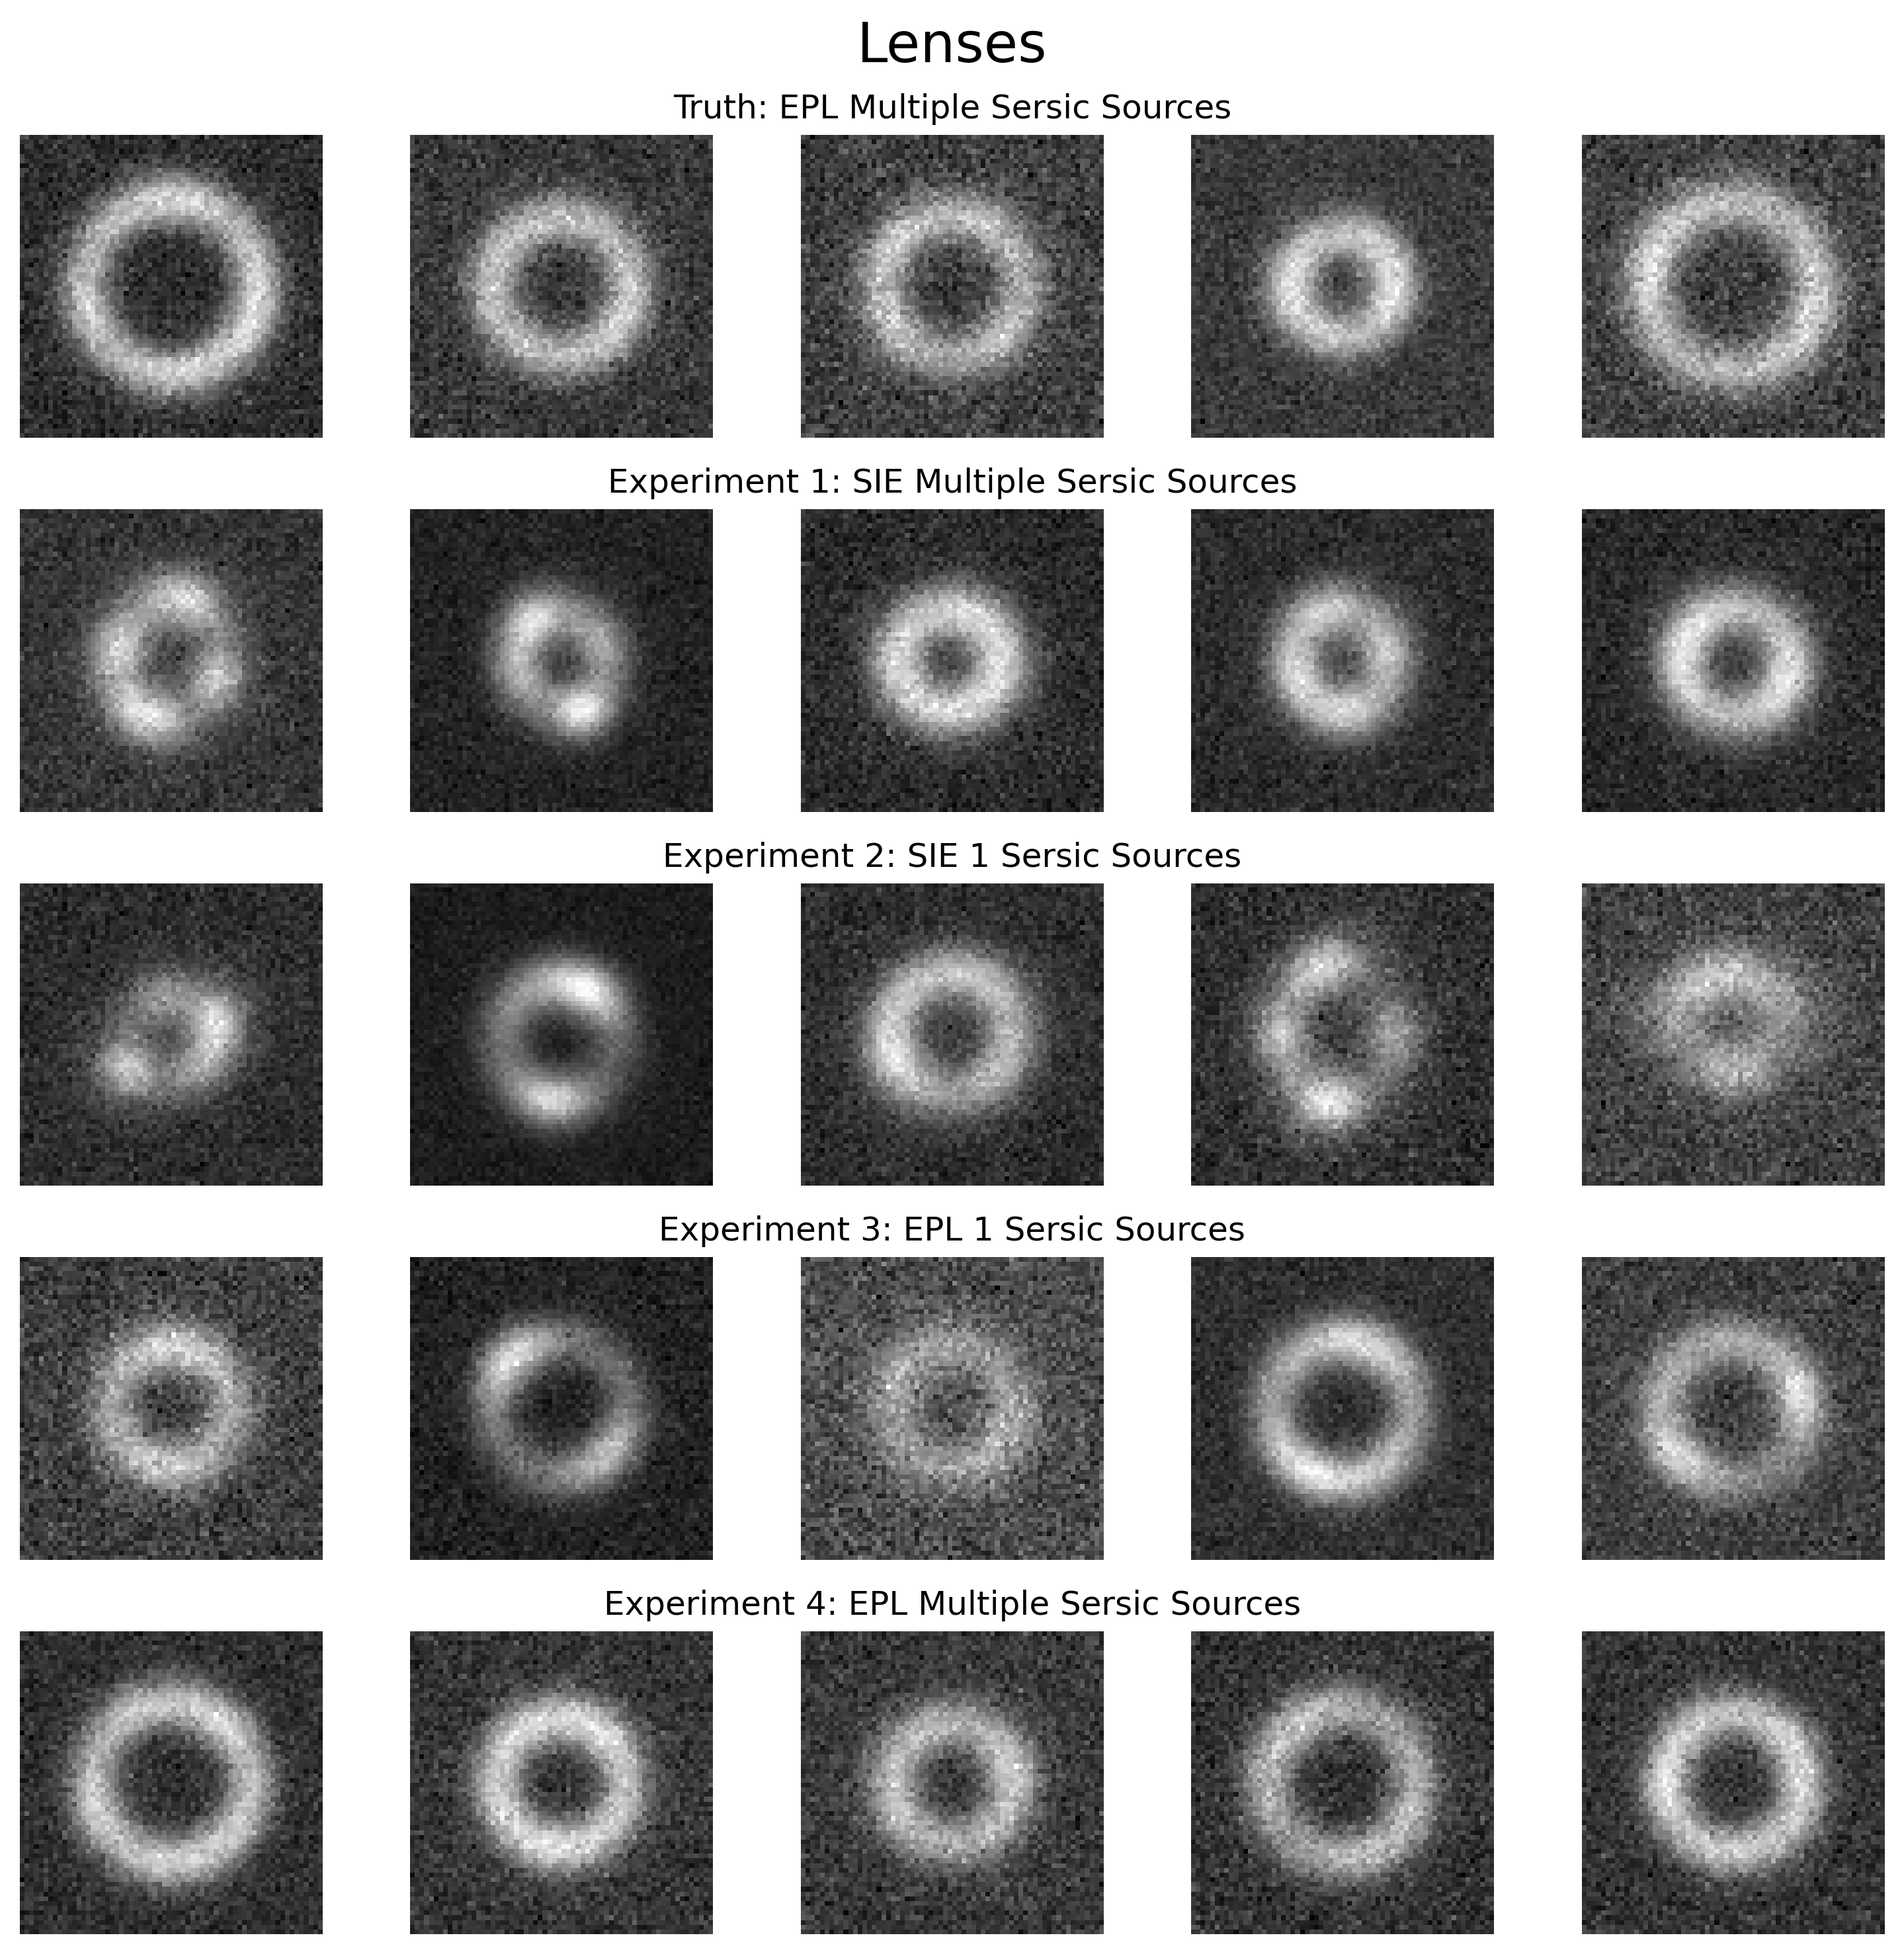

In [7]:
def plot_lenses(truth, exp1, exp2, exp3, exp4):
    # Subplot 5 x 10 (5 rows - Truth, 1st experiment, 2nd experiment, 3rd experiment, 4th experiment and 10 columns - 10 different lenses)
    fig, axs = plt.subplots(5, 5, figsize=(10, 10), dpi=300)
    # fig.subplots_adjust(hspace=0.5, wspace=0.5)
    # Set the title for the entire figure
    fig.suptitle('Lenses', fontsize=20)
    # Set the title for each subplot
    axs[0, 2].set_title('Truth: EPL Multiple Sersic Sources')
    axs[1, 2].set_title('Experiment 1: SIE Multiple Sersic Sources')
    axs[2, 2].set_title('Experiment 2: SIE 1 Sersic Sources')
    axs[3, 2].set_title('Experiment 3: EPL 1 Sersic Sources')
    axs[4, 2].set_title('Experiment 4: EPL Multiple Sersic Sources')
    # Set the title for each column
    # for i in range(10):
    #     axs[0, i].set_title(f'Lense {i+1}')
    # Plot the truth data
    for i in range(5):
        axs[0, i].imshow(truth[i], cmap='gray')
        axs[0, i].axis('off')
    # Plot the experiment 1 data
    for i in range(5):
        axs[1, i].imshow(exp1[i], cmap='gray')
        axs[1, i].axis('off')
    # Plot the experiment 2 data
    for i in range(5):
        axs[2, i].imshow(exp2[i], cmap='gray')
        axs[2, i].axis('off')
    # Plot the experiment 3 data
    for i in range(5):
        axs[3, i].imshow(exp3[i], cmap='gray')
        axs[3, i].axis('off')
    # Plot the experiment 4 data
    for i in range(5):
        axs[4, i].imshow(exp4[i], cmap='gray')
        axs[4, i].axis('off')
    # Make white space between the subplots smaller
    for ax in axs.flat:
        ax.label_outer()
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('equal')
    # Save the figure
    plt.tight_layout()
    plt.show()
    plt.close()

# Plot the lenses
plot_lenses(Truth_Data_epl_multiple_sersic_sources, experiment_1_sie_multiple_sersic_sources, experiment_2_sie_1_sersic_sources, experiment_3_epl_1_sersic_sources, experiment_4_epl_multiple_sersic_sources_v2)

In [8]:
# Reshape the datasets from (1000, image_dim, image_dim) to (1000, image_dim*image_dim)
Truth_Data_epl_multiple_sersic_sources = Truth_Data_epl_multiple_sersic_sources.reshape(Truth_Data_epl_multiple_sersic_sources.shape[0], -1)
experiment_1_sie_multiple_sersic_sources = experiment_1_sie_multiple_sersic_sources.reshape(experiment_1_sie_multiple_sersic_sources.shape[0], -1)
experiment_2_sie_1_sersic_sources = experiment_2_sie_1_sersic_sources.reshape(experiment_2_sie_1_sersic_sources.shape[0], -1)
experiment_3_epl_1_sersic_sources = experiment_3_epl_1_sersic_sources.reshape(experiment_3_epl_1_sersic_sources.shape[0], -1)
experiment_4_epl_multiple_sersic_sources_v2 = experiment_4_epl_multiple_sersic_sources_v2.reshape(experiment_4_epl_multiple_sersic_sources_v2.shape[0], -1)
# Print Shapes of the reshaped datasets
print("Truth Data EPL Multiple Sersic Sources Reshaped Shape: ", Truth_Data_epl_multiple_sersic_sources.shape)
print("Experiment 1 SIE Multiple Sersic Sources Reshaped Shape: ", experiment_1_sie_multiple_sersic_sources.shape)
print("Experiment 2 SIE 1 Sersic Sources Reshaped Shape: ", experiment_2_sie_1_sersic_sources.shape)
print("Experiment 3 EPL 1 Sersic Sources Reshaped Shape: ", experiment_3_epl_1_sersic_sources.shape)
print("Experiment 4 EPL Multiple Sersic Sources V2 Reshaped Shape: ", experiment_4_epl_multiple_sersic_sources_v2.shape)

Truth Data EPL Multiple Sersic Sources Reshaped Shape:  (100, 4096)
Experiment 1 SIE Multiple Sersic Sources Reshaped Shape:  (50000, 4096)
Experiment 2 SIE 1 Sersic Sources Reshaped Shape:  (50000, 4096)
Experiment 3 EPL 1 Sersic Sources Reshaped Shape:  (50000, 4096)
Experiment 4 EPL Multiple Sersic Sources V2 Reshaped Shape:  (50000, 4096)


In [9]:
posterior = [experiment_1_sie_multiple_sersic_sources, experiment_2_sie_1_sersic_sources, experiment_3_epl_1_sersic_sources, experiment_4_epl_multiple_sersic_sources_v2]
truth = Truth_Data_epl_multiple_sersic_sources 

posterior = np.array(posterior) 
truth = np.array(truth) 

n_models, n_samples, img_size = posterior.shape
n_truths = truth.shape[0]
samples_per_truth = n_samples // n_truths

posterior = posterior.reshape(n_models, n_truths, samples_per_truth, img_size)

# Reshape Posterior to only include 100 images per each ground truth | (4, 100, 500, 4096) to (4, 100, 100, 4096)
posterior = posterior[:, :, :100, :]

print(f'Posterior Type {type(posterior)} and Shape {posterior.shape}')
print(f'Truth Type {type(truth)} and Shape {truth.shape}')

Posterior Type <class 'numpy.ndarray'> and Shape (4, 100, 100, 4096)
Truth Type <class 'numpy.ndarray'> and Shape (100, 4096)


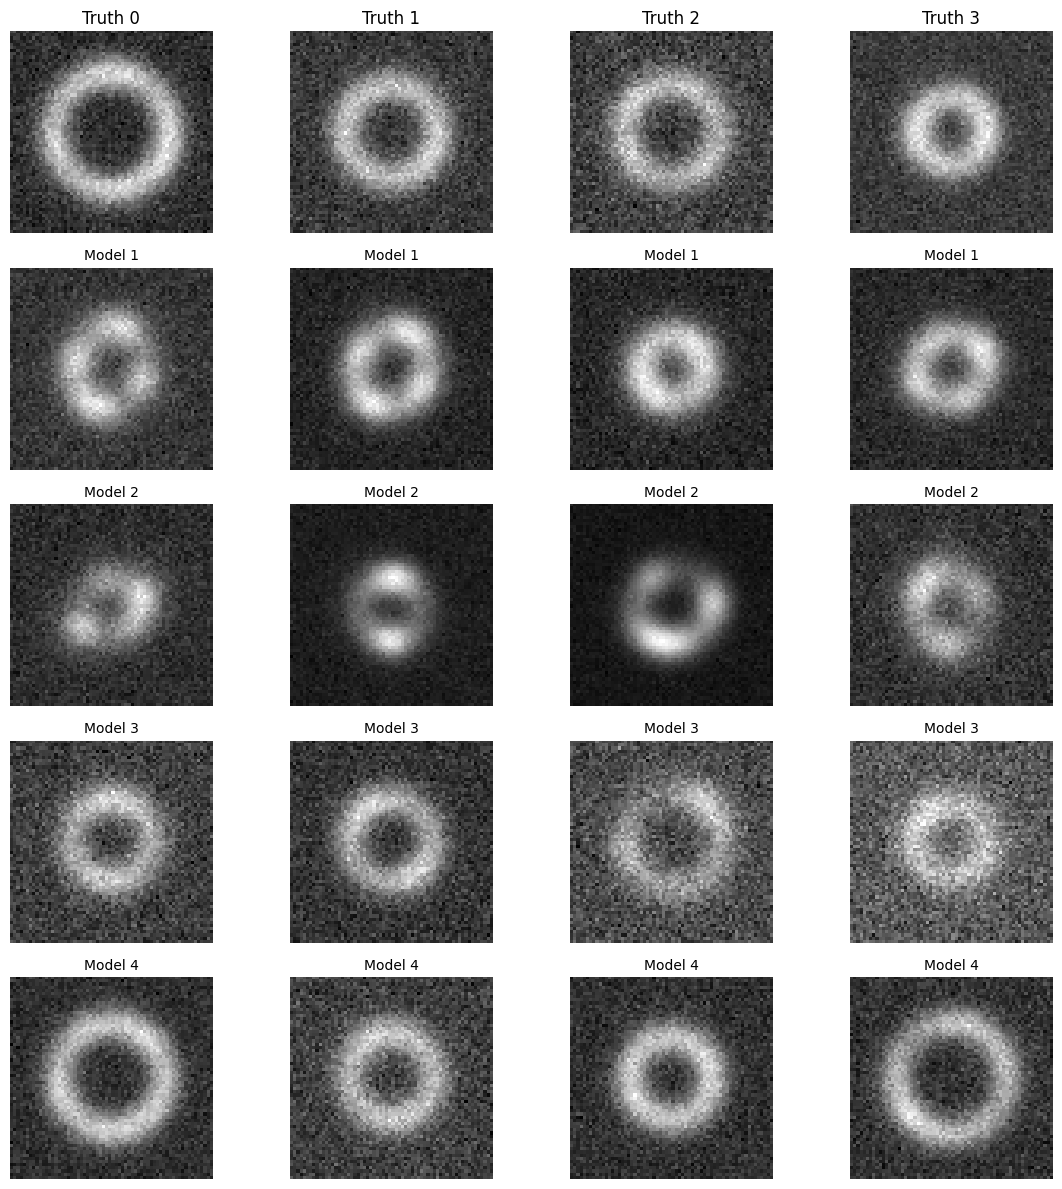

In [10]:
def plot_truth_and_posteriors(truth, posterior, truth_indices=None):
    """
    Plot ground truth and one sample from each model's posterior for selected truths.

    Parameters:
    - truth: numpy array of shape (n_truths, img_size)
    - posterior: numpy array of shape (n_models, n_truths, samples_per_truth, img_size)
    - truth_indices: list or array of indices of ground truths to plot (length 4). If None, select first 4.
    """
    n_models = posterior.shape[0]
    if truth_indices is None:
        truth_indices = np.arange(4)
    else:
        assert len(truth_indices) == 4, "Please provide exactly 4 truth indices."

    fig, axes = plt.subplots(nrows=n_models + 1, ncols=4, figsize=(12, 12))

    for col, idx in enumerate(truth_indices):
        # Plot the ground truth
        axes[0, col].imshow(truth[idx].reshape(image_dim, image_dim), cmap='gray')
        axes[0, col].set_title(f"Truth {idx}", fontsize=12)
        axes[0, col].axis('off')

        # Plot one sample from each model
        for model in range(n_models):
            sample = posterior[model, idx, 0]
            axes[model + 1, col].imshow(sample.reshape(image_dim, image_dim), cmap='gray')
            axes[model + 1, col].set_title(f"Model {model + 1}", fontsize=10)
            axes[model + 1, col].axis('off')

    plt.subplots_adjust(wspace=0.05, hspace=0.2)  # Reduce horizontal and vertical spacing
    plt.tight_layout()
    plt.show()

plot_truth_and_posteriors(truth, posterior, truth_indices=[0, 1, 2, 3])

In [11]:
print(f'Posterior Type {type(posterior)} and Shape {posterior.shape}')
print(f'Truth Type {type(truth)} and Shape {truth.shape}')

Posterior Type <class 'numpy.ndarray'> and Shape (4, 100, 100, 4096)
Truth Type <class 'numpy.ndarray'> and Shape (100, 4096)


In [12]:
# -------------------------------
# Pokie Evaluation
# -------------------------------
device = get_device()
print("Using device:", device)

# Convert to torch Tensors on the chosen device
posterior   = torch.tensor(posterior, dtype=torch.float32, device=device)
truth = torch.tensor(truth,   dtype=torch.float32, device=device)


results, calibrated, n_over_N_vals = pokie(
    truth, posterior, num_runs=100
)

# Convert results, calibrated, n_over_N_vals back to numpy arrays
results = results.cpu().numpy()
calibrated = calibrated.cpu().numpy()
n_over_N_vals = n_over_N_vals.cpu().numpy()

l_values = np.linspace(0, len(results) - 1, len(results))
l_values = np.array(l_values)

print("Model:", l_values)
print("Raw Pokie:", results)
print("Calibrated Pokie:", calibrated)

Using device: mps


Pokie MC runs: 100%|██████████| 100/100 [00:02<00:00, 44.62it/s]


Model: [0. 1. 2. 3.]
Raw Pokie: [0.2529628  0.25310063 0.24267653 0.25125998]
Calibrated Pokie: [0.68455094 0.684924   0.65671504 0.679943  ]


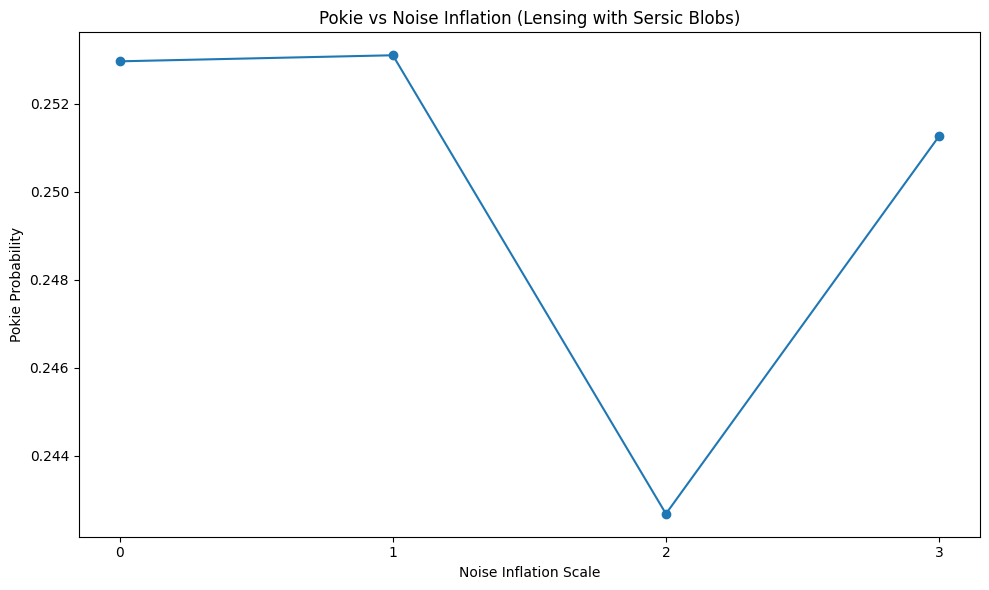

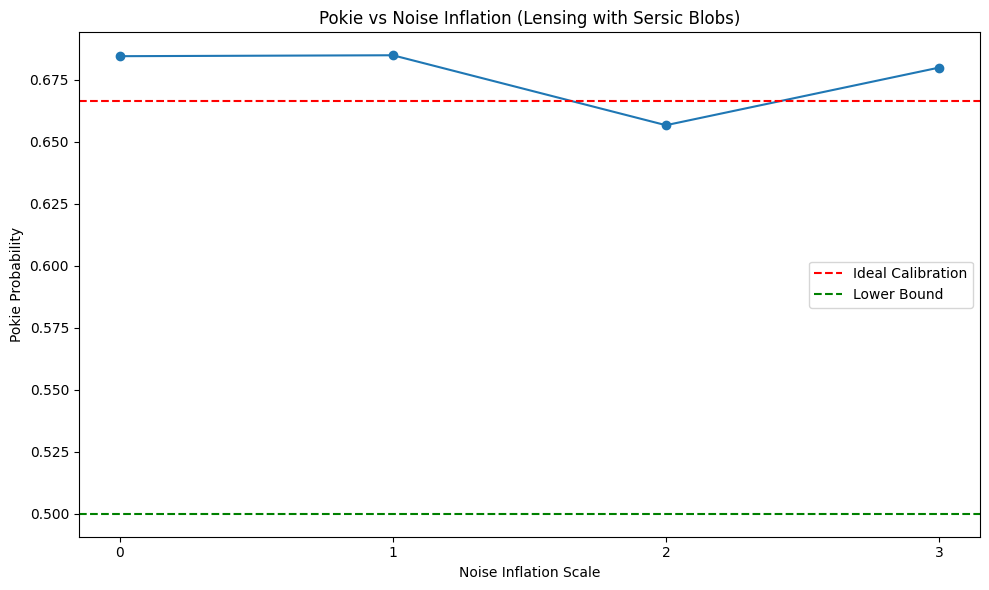

In [13]:
# Plot Pokie vs noise level
plt.figure(figsize=(10, 6))
plt.plot(l_values, results, marker='o')
plt.xlabel('Noise Inflation Scale')
plt.ylabel('Pokie Probability')
plt.title('Pokie vs Noise Inflation (Lensing with Sersic Blobs)')
plt.xticks(l_values)
plt.tight_layout()
plt.savefig("../PLots/Gravitational_Lensing_Experiment/Pokie_Leansing_Serseic_Images.pdf")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(l_values, calibrated, marker='o')
plt.xlabel('Noise Inflation Scale')
plt.ylabel('Pokie Probability')
plt.title('Pokie vs Noise Inflation (Lensing with Sersic Blobs)')
plt.axhline(y=2/3, color='r', linestyle='--', label='Ideal Calibration')
plt.axhline(y=1/2, color='g', linestyle='--', label='Lower Bound')
plt.legend()
plt.xticks(l_values)
plt.tight_layout()
plt.savefig("../PLots/Gravitational_Lensing_Experiment/Pokie_Leansing_Serseic_Calibrated.pdf")
plt.show()

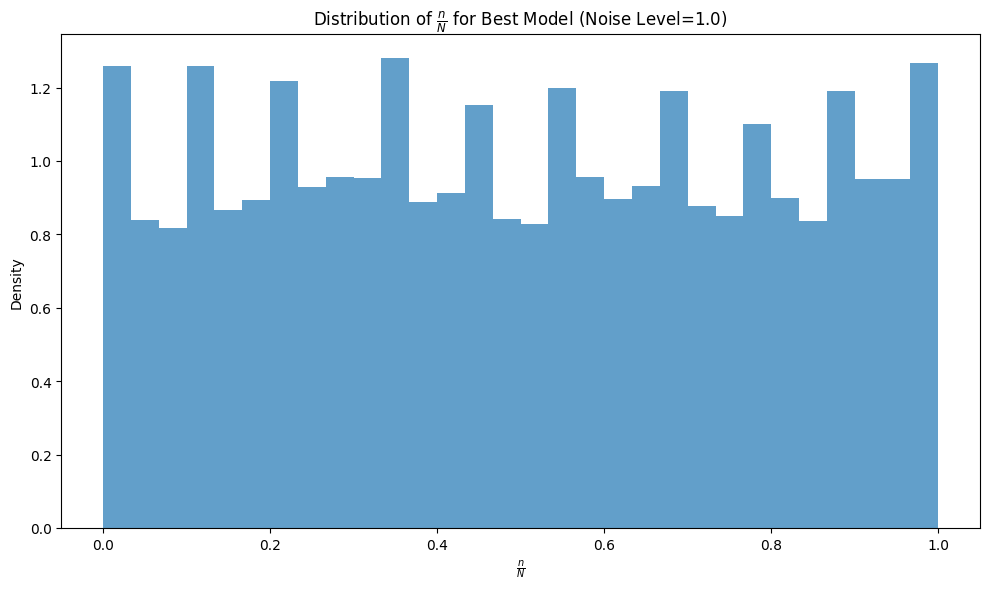

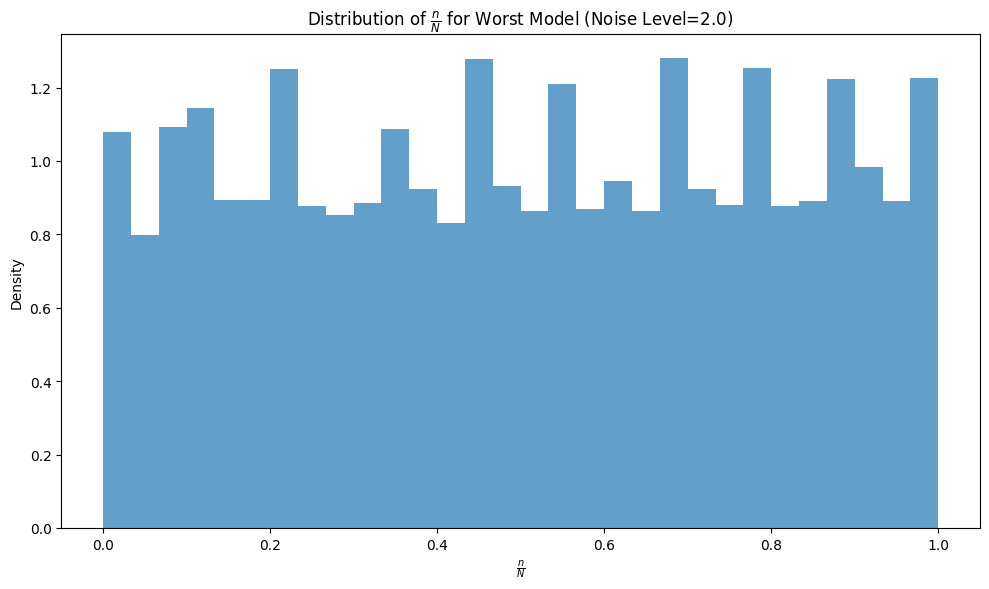

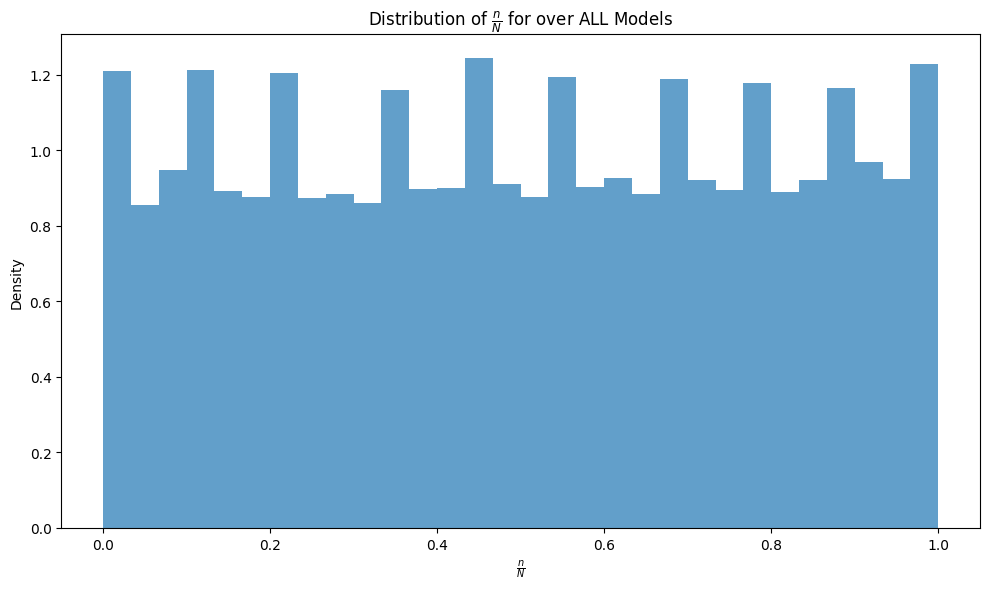

In [14]:
# Identify the best model
best_model_idx = np.argmax(results)

# Extract its n/N values across all runs and all truths, then flatten
# n_over_N_vals has shape (n_runs, n_models, n_truths)
best_vals = n_over_N_vals[:, best_model_idx, :].reshape(-1)

# Plot the distribution of n/N values for the best model
plt.figure(figsize=(10, 6))
plt.hist(best_vals, bins=30, density=True, alpha=0.7)
plt.title(rf"Distribution of $\frac{{n}}{{N}}$ for Best Model (Noise Level={l_values[best_model_idx]})")
plt.xlabel(r"$\frac{n}{N}$")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig("../PLots/Gravitational_Lensing_Experiment/Pokie_Best_Model_n_over_N_Leansing_Serseic_Images.pdf")
plt.show()

# Identify the Worst Model
worst_model_idx = np.argmin(results)

# Extract its n/N values across all runs and all truths, then flatten
# n_over_N_vals has shape (n_runs, n_models, n_truths)
worst_vals = n_over_N_vals[:, worst_model_idx, :].reshape(-1)

# Plot the distribution of n/N values for the worst model
plt.figure(figsize=(10, 6))
plt.hist(worst_vals, bins=30, density=True, alpha=0.7)
plt.title(rf"Distribution of $\frac{{n}}{{N}}$ for Worst Model (Noise Level={l_values[worst_model_idx]})")
plt.xlabel(r"$\frac{n}{N}$")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig("../PLots/Gravitational_Lensing_Experiment/Pokie_Worst_Model_n_over_N_Leansing_Serseic_Images.pdf")
plt.show()

# Concat all n/N values across all models
all_vals = n_over_N_vals.reshape(-1)

# Plot the distribution of n/N values for the worst model
plt.figure(figsize=(10, 6))
plt.hist(all_vals, bins=30, density=True, alpha=0.7)
plt.title(rf"Distribution of $\frac{{n}}{{N}}$ for over ALL Models")
plt.xlabel(r"$\frac{n}{N}$")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig("../PLots/Gravitational_Lensing_Experiment/Pokie_n_over_N_Leansing_Serseic_Images.pdf")
plt.show()

In [15]:
# Identify your device (CUDA > MPS > CPU)
device = get_device()
print("Using device:", device)

out = pokie_with_convergence_estimate(truth, posterior, num_runs = 100)

l_values = np.linspace(0, len(results) - 1, len(results))
l_values = np.array(l_values)

emperical_pokie = out['empirical_pokie'].cpu().numpy()
theoretical_pokie = out['theoretical_pokie'].cpu().numpy()
convergence_gap = out['convergence_gap'].cpu().numpy()
E_lambda = out['E_lambda'].cpu().numpy()
E_lambda_sq = out['E_lambda_sq'].cpu().numpy()
n_over_N_vals = out['n_over_N_vals'].cpu().numpy()

print('\Modes:', l_values)
print('Emperical Pokie:', emperical_pokie)
print('Theoretical Pokie:', theoretical_pokie)
print('Convergence Gap:', convergence_gap)

Using device: mps


Pokie MC runs: 100%|██████████| 100/100 [00:01<00:00, 52.78it/s]


\Modes: [0. 1. 2. 3.]
Emperical Pokie: [0.2534979  0.25213143 0.24310917 0.25126153]
Theoretical Pokie: [0.66494274 0.66420573 0.6681173  0.668719  ]
Convergence Gap: [-0.01961023 -0.01665723  0.01161826 -0.00979501]


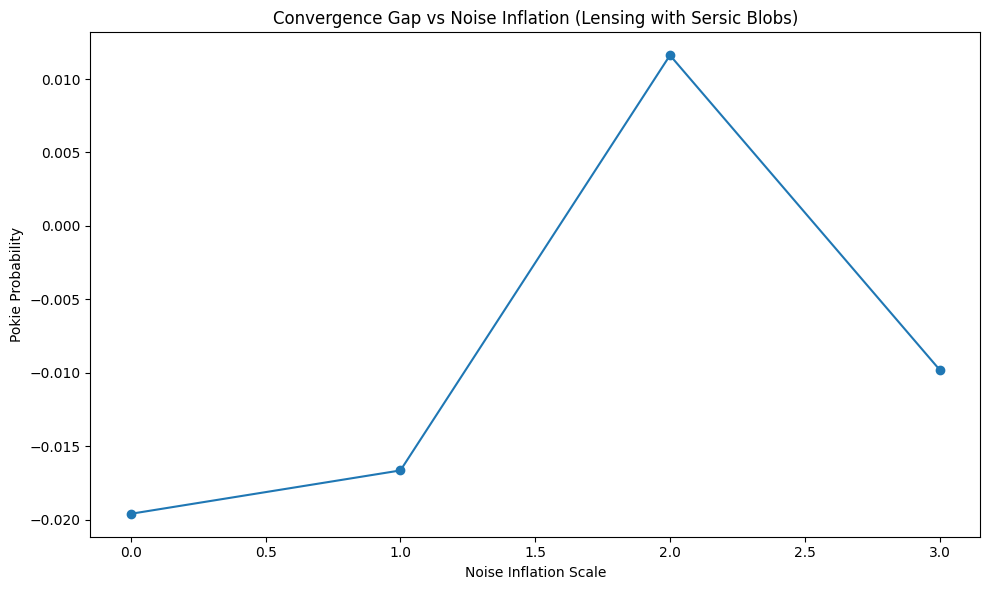

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(l_values, convergence_gap, marker='o')
plt.xlabel('Noise Inflation Scale')
plt.ylabel('Pokie Probability')
plt.title('Convergence Gap vs Noise Inflation (Lensing with Sersic Blobs)')
plt.tight_layout()
plt.savefig("../PLots/Gravitational_Lensing_Experiment/Pokie_Convergence_Gap_Pokie_Leansing_Serseic_Calibrated.pdf")
plt.show()

E[lambda]: 0.507621169090271
E[lambda^2]: 0.3417586386203766


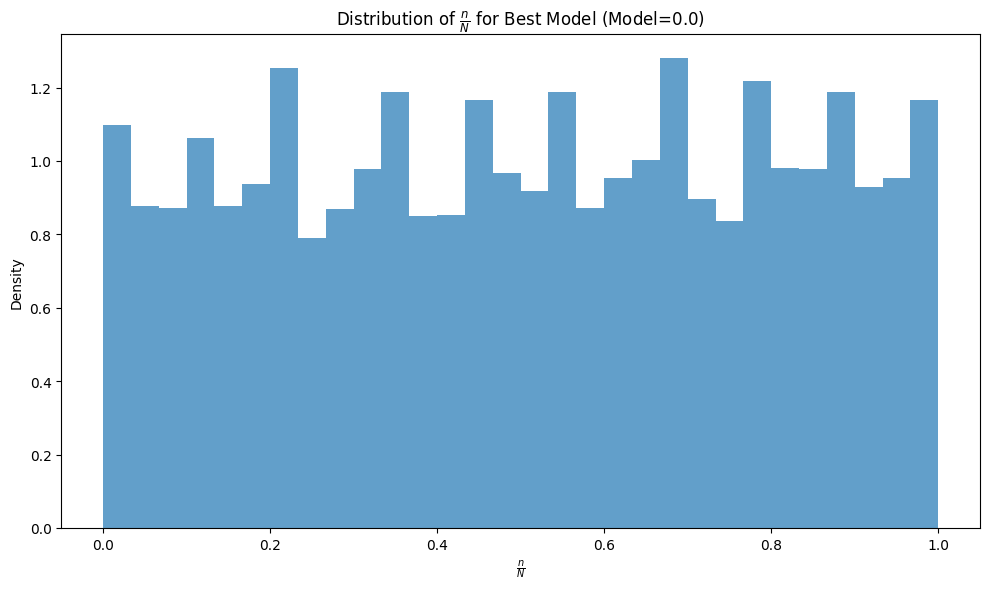

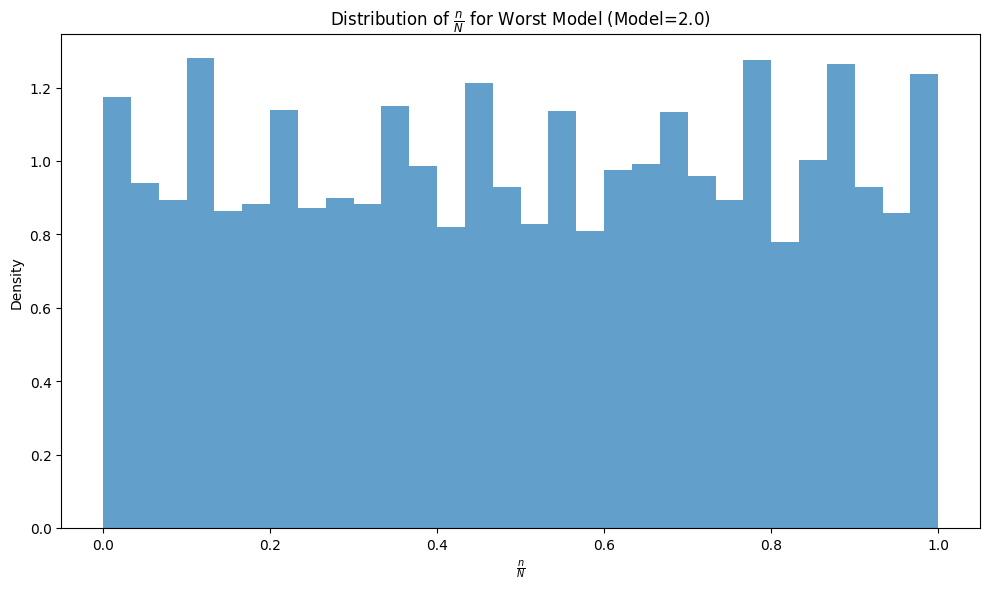

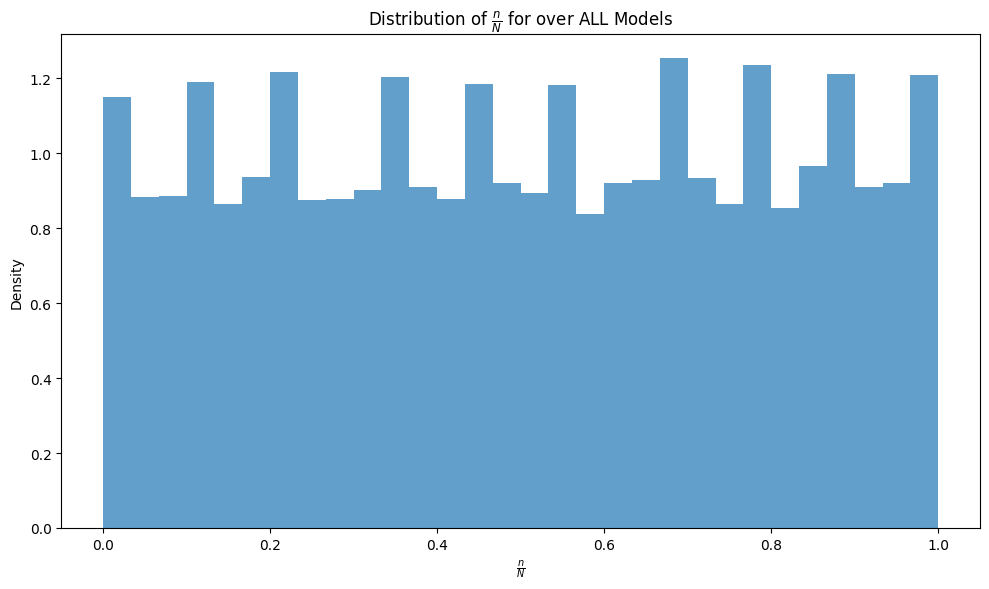

In [18]:
# Identify the best model
best_model_idx = np.argmin(convergence_gap)

# Extract its n/N values across all runs and all truths, then flatten
# n_over_N_vals has shape (n_runs, n_models, n_truths)
best_vals = n_over_N_vals[:, best_model_idx, :].reshape(-1)

print("E[lambda]:", out["E_lambda"][best_model_idx].item())
print("E[lambda^2]:", out["E_lambda_sq"][best_model_idx].item())

# Plot the distribution of n/N values for the best model
plt.figure(figsize=(10, 6))
plt.hist(best_vals, bins=30, density=True, alpha=0.7)
plt.title(rf"Distribution of $\frac{{n}}{{N}}$ for Best Model (Model={l_values[best_model_idx]})")
plt.xlabel(r"$\frac{n}{N}$")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig("../PLots/Gravitational_Lensing_Experiment/Pokie_Convergence_Best_Model_n_over_N_Pokie_Leansing_Serseic_Calibrated.pdf")
plt.show()

# Identify the Worst Model
worst_model_idx = np.argmax(convergence_gap)

# Extract its n/N values across all runs and all truths, then flatten
# n_over_N_vals has shape (n_runs, n_models, n_truths)
worst_vals = n_over_N_vals[:, worst_model_idx, :].reshape(-1)

# Plot the distribution of n/N values for the worst model
plt.figure(figsize=(10, 6))
plt.hist(worst_vals, bins=30, density=True, alpha=0.7)
plt.title(rf"Distribution of $\frac{{n}}{{N}}$ for Worst Model (Model={l_values[worst_model_idx]})")
plt.xlabel(r"$\frac{n}{N}$")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig("../PLots/Gravitational_Lensing_Experiment/Pokie_Convergence_Worst_Model_n_over_N_Pokie_Leansing_Serseic_Calibrated.pdf")
plt.show()

# Concat all n/N values across all models
all_vals = n_over_N_vals.reshape(-1)

# Plot the distribution of n/N values for the worst model
plt.figure(figsize=(10, 6))
plt.hist(all_vals, bins=30, density=True, alpha=0.7)
plt.title(rf"Distribution of $\frac{{n}}{{N}}$ for over ALL Models")
plt.xlabel(r"$\frac{n}{N}$")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig("../PLots/Gravitational_Lensing_Experiment/Pokie_Convergence_n_over_N_Pokie_Leansing_Serseic_Calibrated.pdf")
plt.show()

In [ ]:
Truth_Data_epl_multiple_sersic_sources_hdf5.close()
experiment_1_sie_multiple_sersic_sources_hdf5.close()
experiment_2_sie_1_sersic_sources_hdf5.close()
experiment_3_epl_1_sersic_sources_hdf5.close()
experiment_4_epl_multiple_sersic_sources_v2_hdf5.close()